In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [5]:
filename = "https://raw.githubusercontent.com/benvictoria17/DataVisualization/master/dataset/Crab%20Age%20Prediction/CrabAgePrediction.csv"
df = pd.read_csv(filename)
df.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6


In [6]:
df.describe()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000
mean,1.311306,1.020893,0.349374,23.567275,10.207342,5.136546,6.795844,9.954791
std,0.300431,0.248233,0.104976,13.891201,6.275275,3.104133,3.943392,3.220967
min,0.187500,0.137500,0.000000,0.056699,0.028349,0.014175,0.042524,1.000000
25%,1.125000,0.875000,0.287500,12.672227,5.343881,2.664853,3.713785,8.000000
50%,1.362500,1.062500,0.362500,22.792998,9.539607,4.861939,6.662133,10.000000
75%,1.537500,1.200000,0.412500,32.786197,14.273973,7.200773,9.355335,11.000000
max,2.037500,1.625000,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


In [7]:
df['Sex'].value_counts()

M    1435
I    1233
F    1225
Name: Sex, dtype: int64

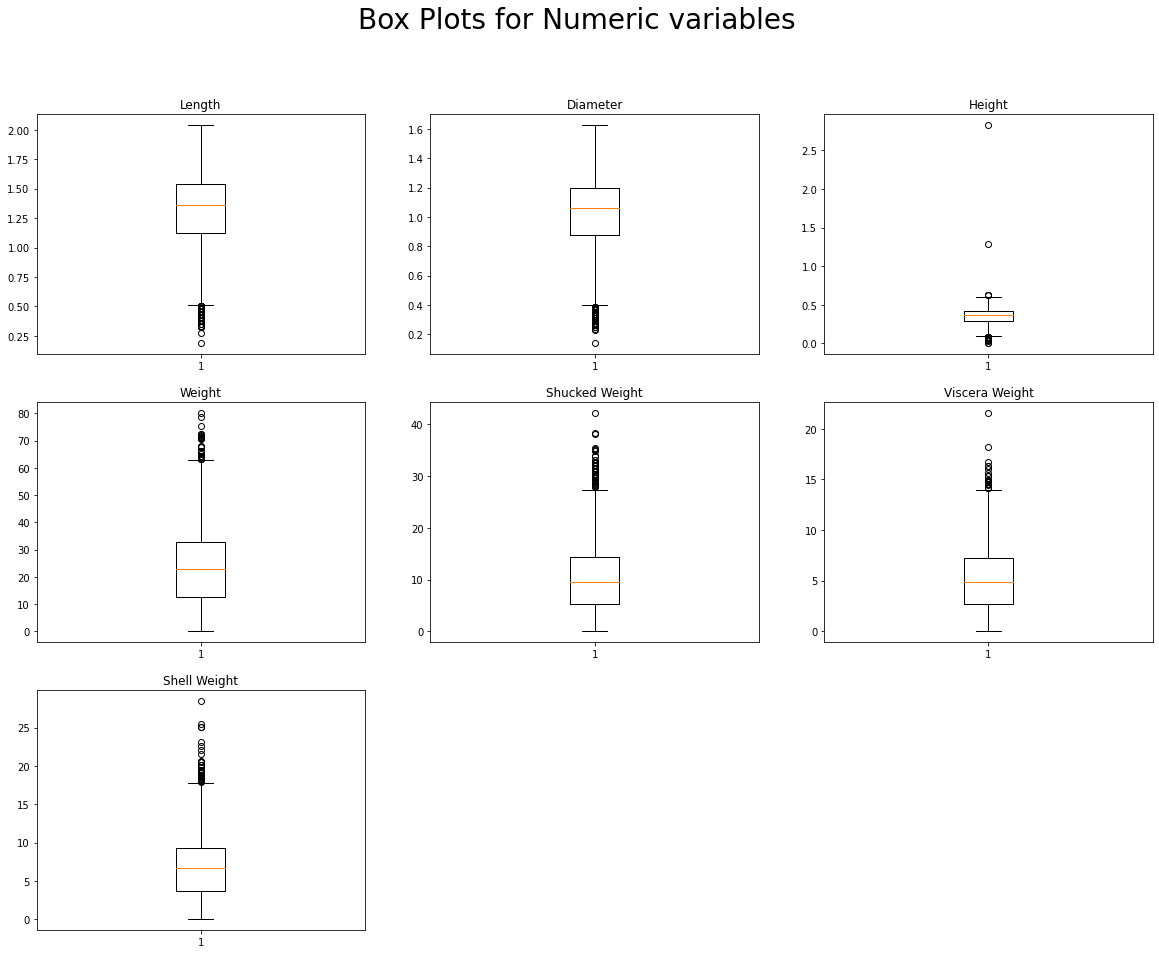

In [8]:
fig, ax = plt.subplots(figsize=(20,15))

def plot_box_subplot(plot_number, variable, nrows, ncols, dataset):
    ax = plt.subplot(nrows, ncols, plot_number)
    ax.boxplot(dataset[variable])
    ax.set_title(variable, fontsize=12)
    pass

variables = list(df.columns)
variables.remove('Age')
variables.remove('Sex')

for i in range(len(variables)):
    plot_box_subplot(i+1, variables[i], 3, 3, df)
plt.suptitle('Box Plots for Numeric variables', fontsize=28)
plt.show()

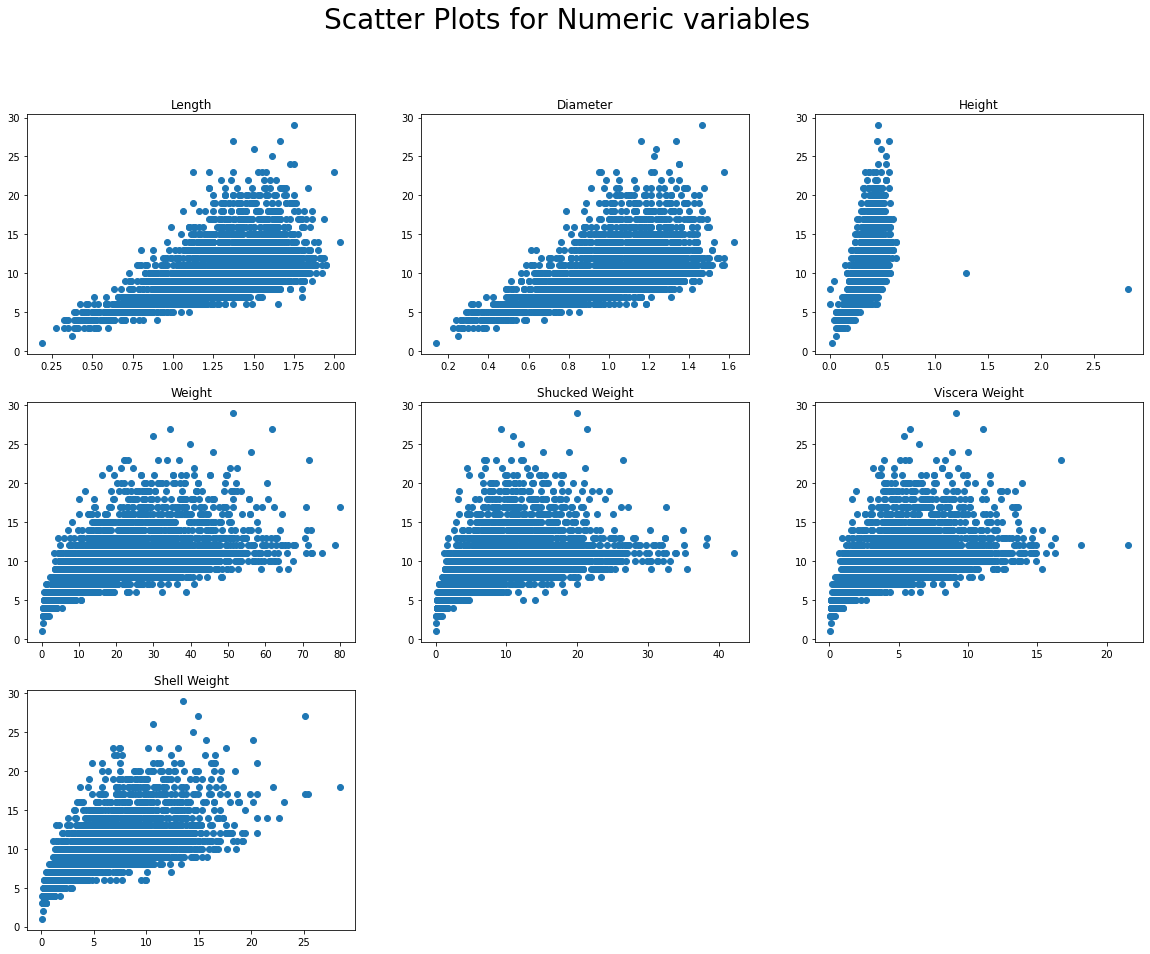

In [9]:
fig, ax = plt.subplots(figsize=(20,15))

def plot_scatter_subplot(plot_number, independent_variable, dependent_variable, nrows,
                         ncols, dataset):
    ax = plt.subplot(nrows, ncols, plot_number)
    ax.scatter(dataset[independent_variable], dataset[dependent_variable])
    ax.set_title(independent_variable, fontsize=12)
    pass

variables = list(df.columns)
variables.remove('Age')
variables.remove('Sex')

for i in range(len(variables)):
    plot_scatter_subplot(i+1, variables[i], 'Age', 3, 3, df)
plt.suptitle('Scatter Plots for Numeric variables', fontsize=28)
plt.show()

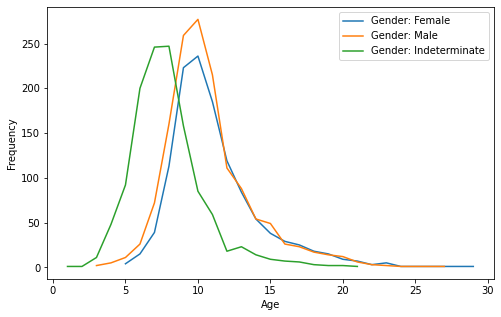

In [10]:
f_df = df[df["Sex"]=='F'][["Weight", "Age"]]
m_df = df[df["Sex"]=='M'][["Weight", "Age"]]
i_df = df[df["Sex"]=='I'][["Weight", "Age"]]

# Group by Age
f_df = f_df.groupby("Age").count()
m_df = m_df.groupby("Age").count()
i_df = i_df.groupby("Age").count()

# rename columns
f_df.columns = ["Count"]
m_df.columns = ["Count"]
i_df.columns = ["Count"]
plt.rcParams['figure.figsize'] = [8, 5]
plt.plot(f_df.index, f_df["Count"], label="Gender: Female")
plt.plot(m_df.index, m_df["Count"], label="Gender: Male")
plt.plot(i_df.index, i_df["Count"], label="Gender: Indeterminate")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.legend()
plt.show()